In [1]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(cowplot)
library(dplyr)

#dir include h5 and spatial_dir
dir = c('/home/liusong/scRNA/endometriosis/V2data/SpatialTranscriptome/fastq/GSY_OMA',
	'/home/liusong/scRNA/endometriosis/V2data/SpatialTranscriptome/fastq/YXM_OMA',
	'/home/liusong/scRNA/endometriosis/V2data/SpatialTranscriptome/fastq/WZZ_OMA')
names(dir) = c('GSY', 'YXM','WZZ')
pandata <- list()
for(i in 1:length(dir)){
pandata[[i]] <-Seurat::Load10X_Spatial(data.dir = dir[i])
pandata[[i]]@meta.data$orig.ident <-names(dir)[i]
pandata[[i]]@images[["slice1"]]@coordinates[["tissue"]] <- as.integer(pandata[[i]]@images[["slice1"]]@coordinates[["tissue"]])
pandata[[i]]@images[["slice1"]]@coordinates[["row"]] <- as.integer(pandata[[i]]@images[["slice1"]]@coordinates[["row"]])
pandata[[i]]@images[["slice1"]]@coordinates[["col"]] <- as.integer(pandata[[i]]@images[["slice1"]]@coordinates[["col"]])
pandata[[i]]@images[["slice1"]]@coordinates[["imagerow"]] <- as.integer(pandata[[i]]@images[["slice1"]]@coordinates[["imagerow"]])
pandata[[i]]@images[["slice1"]]@coordinates[["imagecol"]] <- as.integer(pandata[[i]]@images[["slice1"]]@coordinates[["imagecol"]])

pandata[[i]]@meta.data$percent.mt <- PercentageFeatureSet(pandata[[i]], pattern = "^MT[-]")
pandata[[i]]<-subset(pandata[[i]], subset = nFeature_Spatial > 1000 & nCount_Spatial > 1000 & percent.mt < 15 & nCount_Spatial < 100000)
}
panmerge <- merge(pandata[[1]], y=c(pandata[[2]],pandata[[3]]))

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Not validating Seurat objects"
Warning message:
"Not validating Seurat objects"
Warning message:
"Not validating Seurat objects"
Warning message:
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Warning message:
"Key 'slice1_' taken, using 'slice13_' instead"


In [2]:
plot1 <- VlnPlot(panmerge, features = "nFeature_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- VlnPlot(panmerge, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot3<-VlnPlot(panmerge, features = "percent.mt", pt.size = 0.1) + NoLegend()

plota<-SpatialFeaturePlot(panmerge, features = "nFeature_Spatial") + theme(legend.position = "right")
plotb<-SpatialFeaturePlot(panmerge, features = "nCount_Spatial") + theme(legend.position = "right")
plotc<-SpatialFeaturePlot(panmerge, features = "percent.mt") + theme(legend.position = "right")

Warning message:
"Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"Default search for "data" layer in "Spatial" assay yielded no results; utilizing "counts" layer instead."


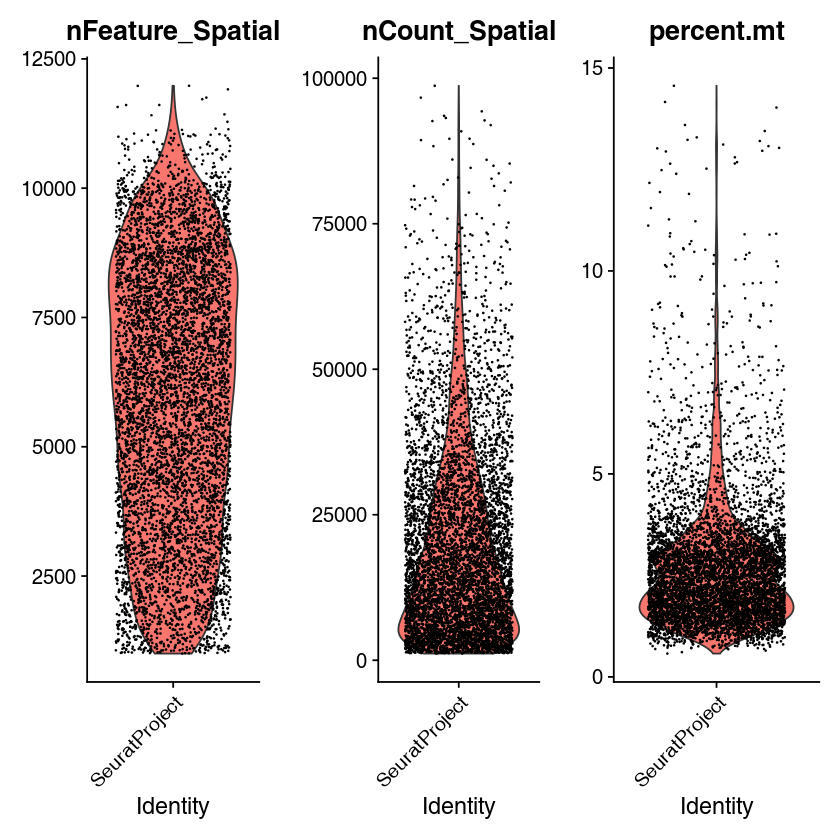

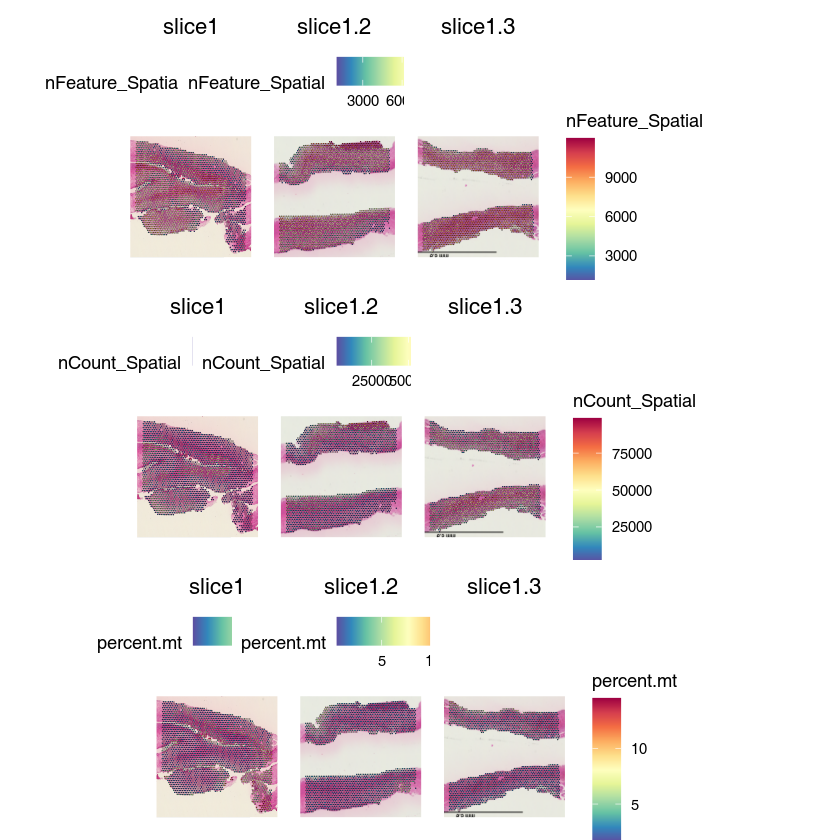

In [3]:
plot_grid(plot1, plot2,plot3,ncol=3)
plot_grid(plota,plotb,plotc,ncol=1)

In [4]:
#SCT transform
for (i in 1:length(pandata)) {
    pandata[[i]] <- SCTransform(pandata[[i]], assay = "Spatial", return.only.var.genes = FALSE, verbose = FALSE)} 



In [5]:
##SCT remove batch######
adata<-pandata
features <- SelectIntegrationFeatures(object.list = adata, nfeatures = 2000)
adata <- PrepSCTIntegration(object.list = adata, anchor.features = features)
adata <- FindIntegrationAnchors(object.list = adata, normalization.method = "SCT", anchor.features = features)
adata.sct <- IntegrateData(anchorset = adata, normalization.method = "SCT")


Warning message in CheckDuplicateCellNames(object.list = object.list):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."
Finding all pairwise anchors

Running CCA

Merging objects

Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Finding neighborhoods

Finding anchors

	Found 5872 anchors

Filtering anchors

	Retained 4307 anchors

Running CCA

Merging objects

Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Finding neighborhoods

Finding anchors

	Found 5166 anchors

Filtering anchors

	Retained 3624 anchors

Running CCA

Merging objects

Warning message:
"Adding image data that isn't associated with any assays"

[1] 1


Warning message:
"Different cells and/or features from existing assay SCT"


[1] 2


Warning message:
"Different cells and/or features from existing assay SCT"


[1] 3


Warning message:
"Different cells and/or features from existing assay SCT"
Merging dataset 3 into 1

Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Extracting anchors for merged samples

Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 1 3

Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Adding image data that isn't associated with any assays"
Warning message:
"Key 'slice1_' taken, using 'slice12_' instead"
Extracting anchors for merged

Regressing out nCount_SCT, percent.mt

Centering and scaling data matrix

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
11:09:37 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

11:09:37 Read 6412 rows and found 15 numeric columns

11:09:37 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

11:09:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6412
Number of edges: 216796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8489
Number of communities: 11
Elapsed time: 6 seconds


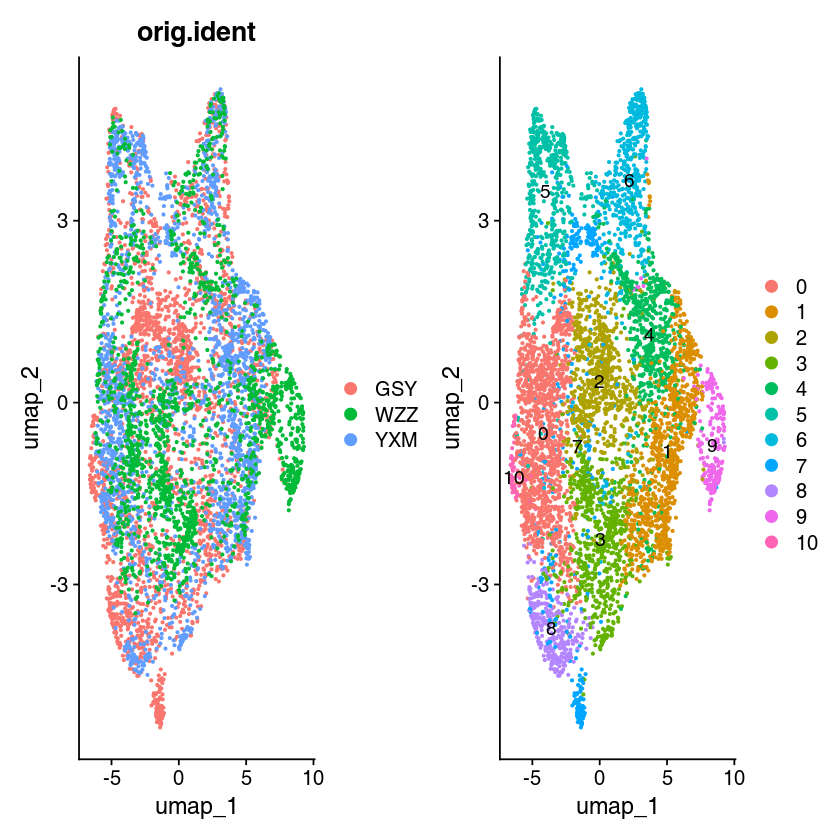

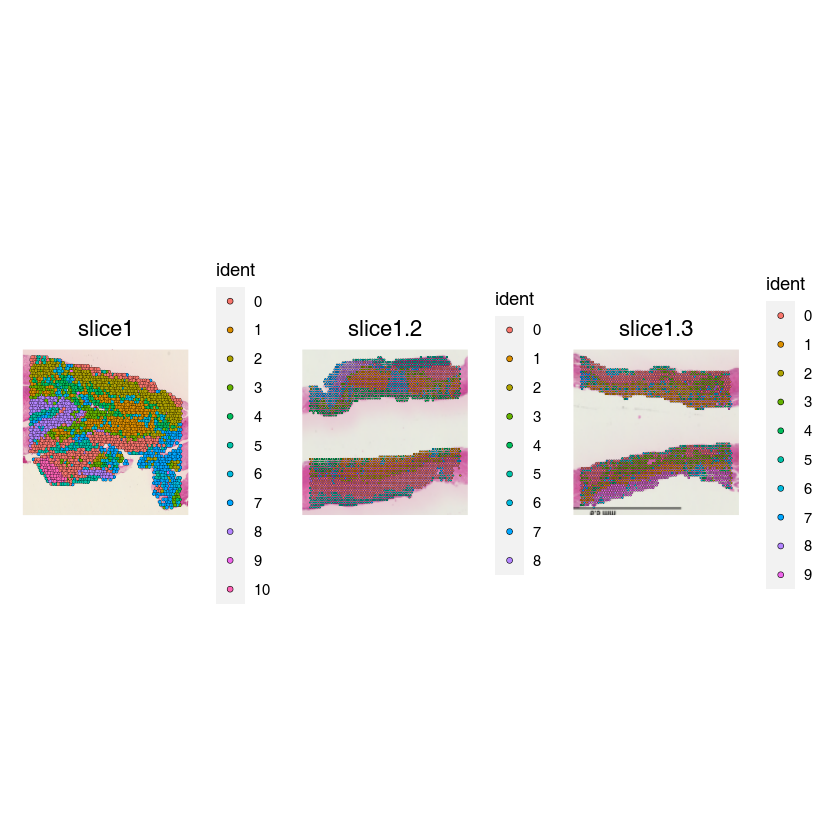

In [6]:
#DefaultAssay(adata.sct) <- "integrated"
adata.sct <- ScaleData(adata.sct,vars.to.regress = c("nCount_SCT", "percent.mt"))
adata.sct <- RunPCA(adata.sct, verbose = FALSE)
adata.sct <- RunUMAP(adata.sct, reduction = "pca", dims = 1:15)

adata.sct <- FindNeighbors(adata.sct, dims = 1:15)
adata.sct <- FindClusters(adata.sct, resolution = 0.5)
plot1 <- DimPlot(adata.sct, reduction = "umap",pt.size=0.5, group.by = "orig.ident")
plot2 <- DimPlot(adata.sct, reduction = "umap",pt.size=0.5,label=T)
plot1 + plot2

plots<-SpatialDimPlot(adata.sct, label.size = 3,pt.size.factor=4)
plots

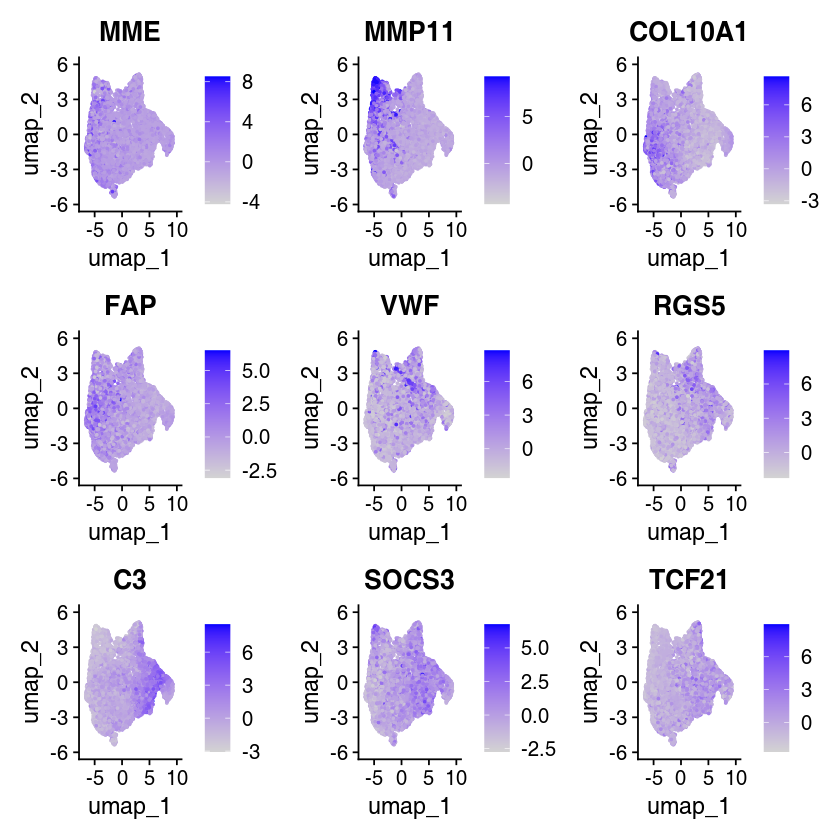

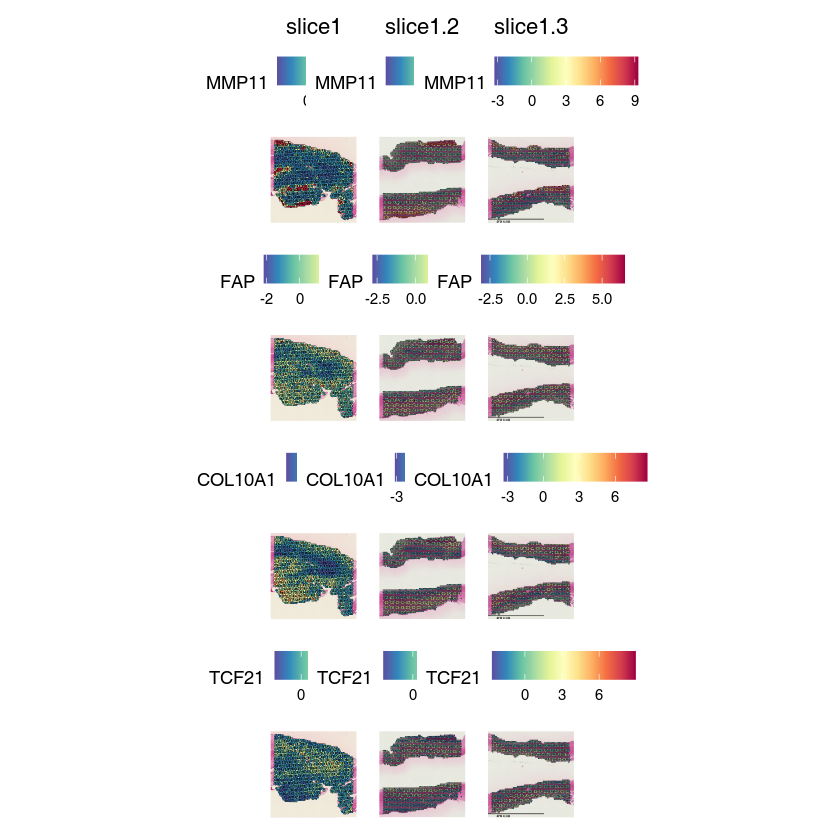

Warning message:
"Faceting the highlight only works with a single image, using image slice1"


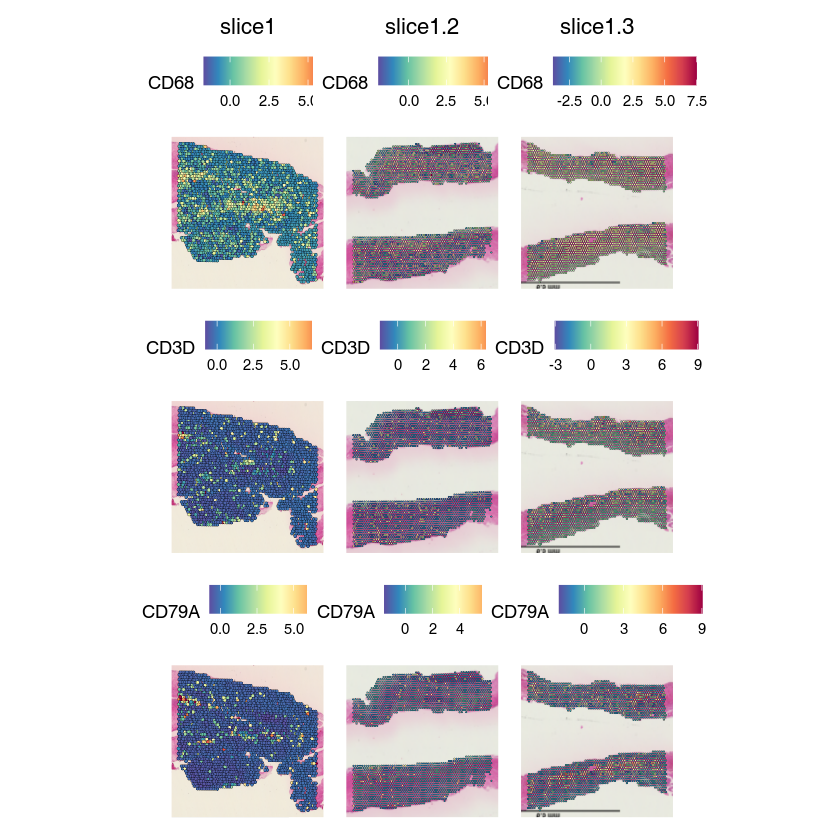

Calculating cluster 0

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 1

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 2

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 3

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 4

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 5

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 6

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 7

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster 8

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster

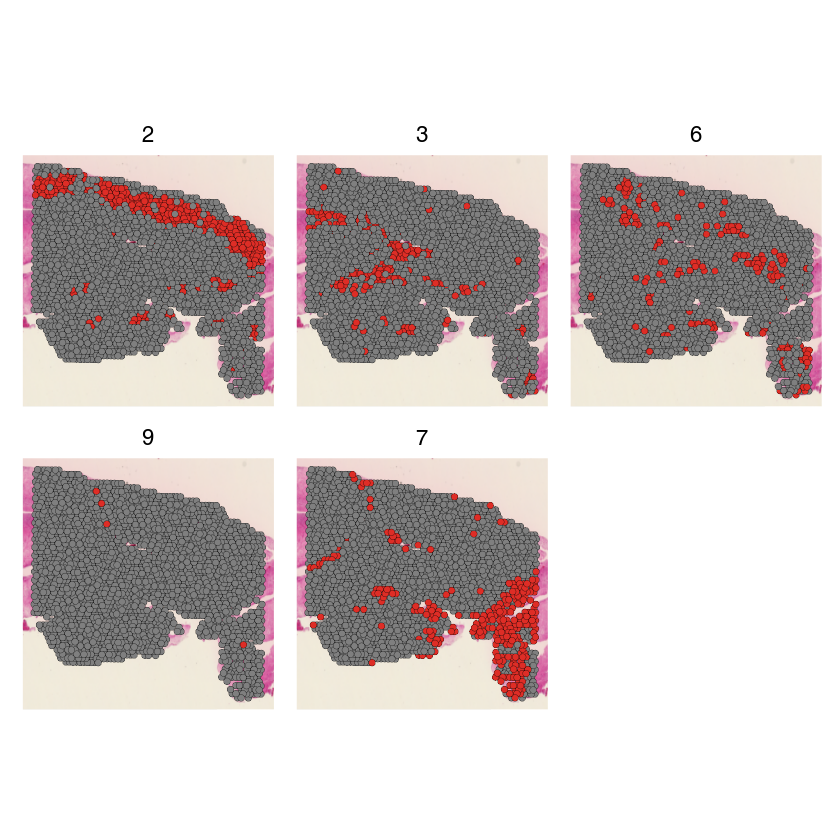

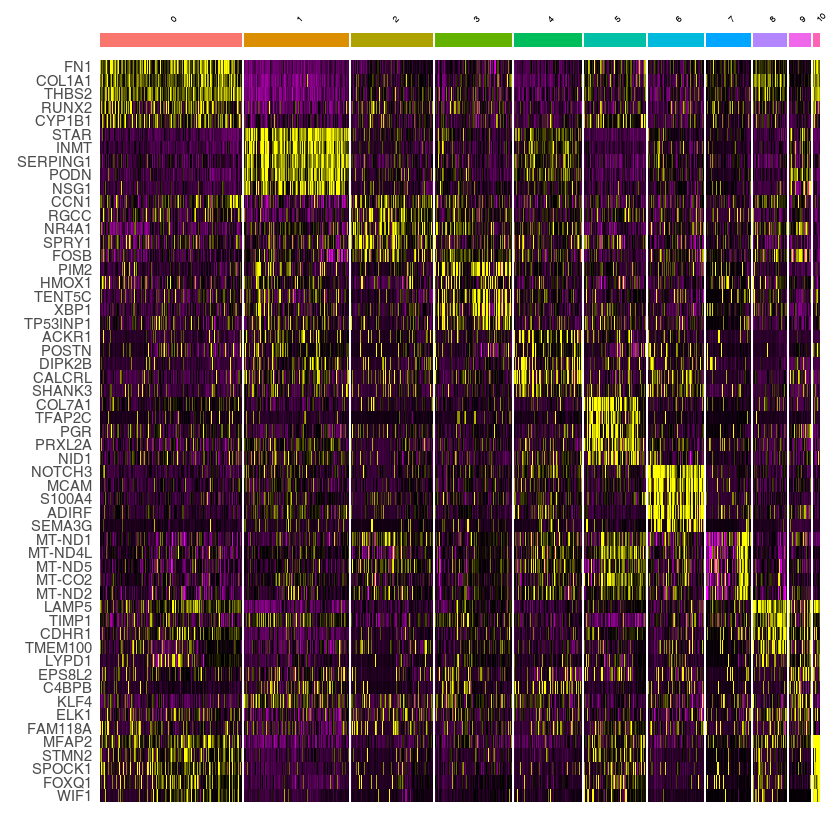

In [7]:
FeaturePlot(adata.sct,features=c("MME",'MMP11','COL10A1','FAP','VWF','RGS5','C3','SOCS3','TCF21'),pt.size=0.4)
SpatialFeaturePlot(adata.sct,features=c('MMP11','FAP','COL10A1','TCF21'),pt.size.factor=4)
SpatialFeaturePlot(adata.sct,features=c('CD68','CD3D','CD79A'),pt.size.factor=4)

SpatialDimPlot(adata.sct, cells.highlight = CellsByIdentities(object = adata.sct, idents = c(2,3,6,9,7)), facet.highlight = TRUE, ncol = 3, pt.size.factor = 5)
panmarkers <- FindAllMarkers(adata.sct, only.pos = TRUE, min.pct = 0.4, logfc.threshold = 0.5,test.use = "wilcox")

topgene5<-panmarkers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_log2FC)
DoHeatmap(adata.sct, features = topgene5$gene,size = 2) + NoLegend()
adata<- RenameIdents(adata.sct, '0' = 'OB', '1'='OA','2' = 'OM','3'="OM",'4'='Endo','5'='EC','6'='pericyte','7'='OUn','8'='OB','9'='OUn','10'='OB')

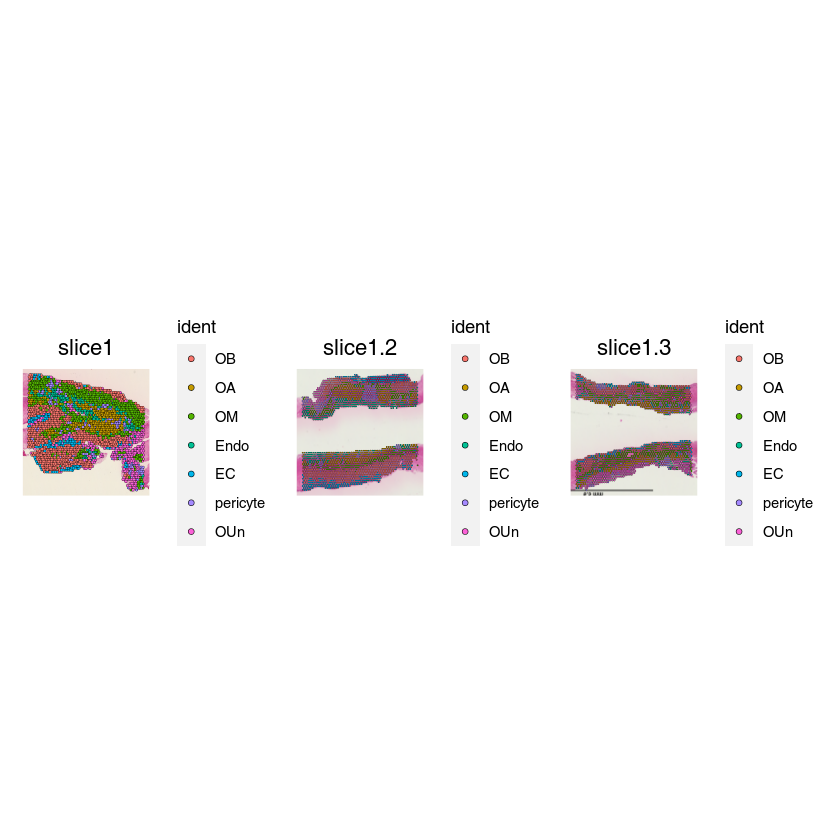

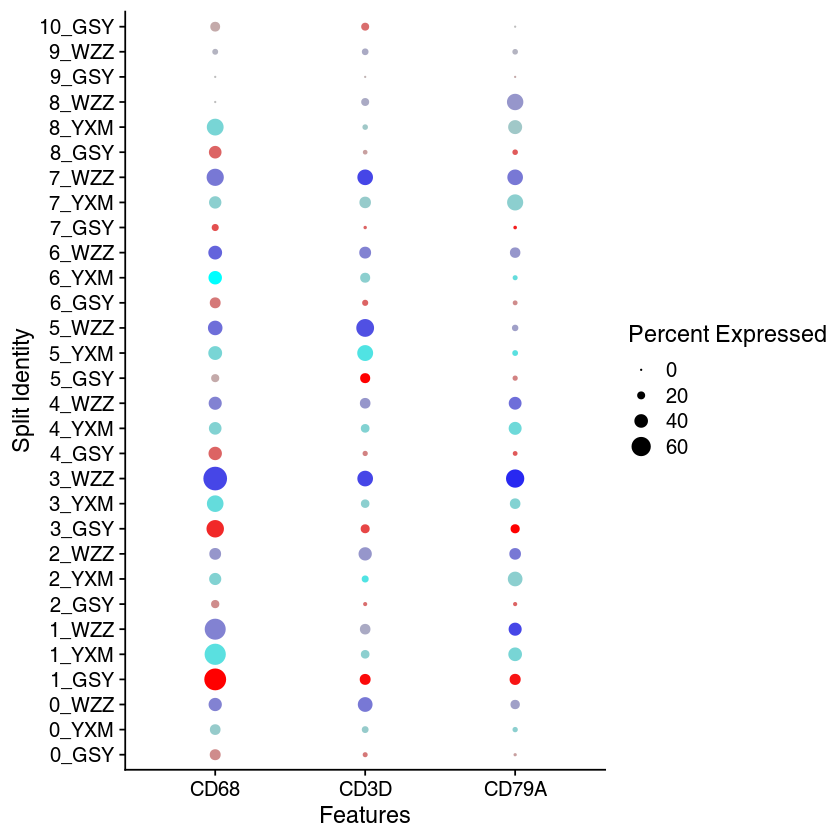

In [9]:
SpatialDimPlot(adata, label.size = 3,pt.size.factor=4)
DotPlot(adata.sct,features=c('CD68','CD3D','CD79A'),split.by="orig.ident",cols=c("red","cyan","blue"))
